In [9]:
from src.models.modulated_siren import ModulatedSirenModel
from src.datasets.chairs import get_mgrid
import torch

In [14]:
from src.models.modulated_siren import ModulatedSirenModel
import pytorch_lightning as pl

# Create an instance of the ModulatedSirenModel
model = ModulatedSirenModel(in_features=2, hidden_features=256, hidden_layers=2, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

# Load the checkpoint
checkpoint_path = "checkpoints/all_chairs_fully_fledged_meta_learning/last.ckpt"
model = model.load_from_checkpoint(checkpoint_path, in_features=2, hidden_features=256, hidden_layers=10, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

LR IS 3e-06
LR IS 3e-06


Chairs dataset initialized
['292621234cdb42969c76680ce8100088', '768843209e734d569d1b527c1f3511a1', '66624c84a4d94559b35914ee2ada4c4b', 'a9328e057fe049ff8b0c35489e0dfb8d', '607a3bf3fbc54bd2b9da08c18f625ee4', '039c6026571943d6ac45c6816bcc7ff1', '4c302192035d40e59b7c0f18bb74f212', '6a', 'd2d5000b1e7a4d9a8a4a637267418061', '0f7366550f694e1cb9efddea214a3c33', '9f7890238c4442d789d1970cead93203', '3efb9e42f49f47c6bd1d36f86281888b', '9d53c4f8a4394a9ca333da20138cd897', '79c0f5d111324264b4c6fea9402df88e', '4e', 'c6e96', 'c25d29', '03f16302c1a54c46b438dac78e9d7048', '600e', '64b170e4864549c382b6c94c529203d7', '2820827abdcd4e79b7c67683292416aa', '934b7b5515da4720b0af2764924aad3a', '053039b95c314104b5fe0dfb19f43cb3', '43c8828e83124e1e90e85c9e57b404c8', '2ec01ec1eb874f6fb11ef732fb575267', '392e2810e1e24b02b2fdbc1dd3f21064', 'fab9443d48e24fbfa309187df78d58e6', '0edcc9053a114e7f8a706cae0864e7be', 'b10ee58a01b649d381598d899850176c', '15b2ebce6f084c3ea8d582c168ff478e', 'ddd35916c5d84fd8ab4c38380a73fb5b

tensor([[0.0031, 0.0027, 0.0012],
        [0.0031, 0.0028, 0.0013],
        [0.0031, 0.0028, 0.0013],
        ...,
        [0.0010, 0.0011, 0.0005],
        [0.0009, 0.0011, 0.0006],
        [0.0009, 0.0011, 0.0008]], grad_fn=<AddBackward0>)


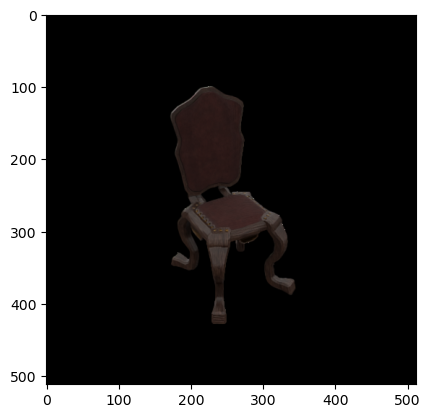

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.datamodules.chairs_datamodule import ChairsDatamodule
import torchvision. transforms as T
from PIL import Image

# Define the grid
chairs = ChairsDatamodule("/home/arkadi.piven/Code/functa/rendered/chair", 1)
transform = T.ToPILImage()
coords, pixels = chairs.train_dataset[345]
print(chairs.train_dataset.get_chair_name_by_idx(6))
coords = get_mgrid(512, 2)
print(pixels)
pixels = pixels * 0.5 + 0.5
# # Pass the coordinates through the model
output = model(coords)
output = output * 0.5 + 0.5
print(output)


# Reshape the output to (512, 512, 3)
# print(output.shape)

# # Plot the image

plt.imshow(pixels.view(512,512,3).detach().numpy())

# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


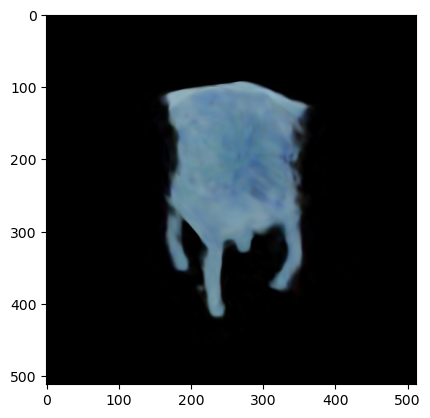

In [19]:
# Output base weights
plt.imshow(output.view(512,512,3).detach().numpy())

## Train latent and visualize

BEGIN OF TRAINING PHI Parameter containing:
tensor([ 2.8971e-04, -1.2095e-03,  1.0446e-04,  5.3193e-03,  3.3709e-03,
        -8.8960e-03, -8.2445e-03, -4.2248e-03, -6.5213e-03,  4.5434e-03,
        -1.7588e-03,  2.5929e-03, -6.5100e-04,  1.0636e-02, -5.0094e-03,
         2.7454e-03,  3.8054e-03, -3.2665e-04,  3.9424e-03,  2.9817e-03,
        -2.0084e-04, -6.2795e-03,  1.4043e-05,  1.7272e-03,  4.7305e-03,
         5.8957e-03, -3.0011e-03, -4.9952e-03, -1.4546e-03,  1.9277e-03,
         4.7427e-03,  9.5163e-04,  3.8023e-04, -4.0328e-03, -2.3712e-03,
         1.2890e-02, -1.0323e-02, -4.0567e-03,  2.2778e-03, -1.0080e-02,
        -2.8356e-03,  1.8914e-03, -5.6888e-04, -1.2677e-03,  6.7251e-03,
        -4.6986e-04,  1.8237e-03, -1.8757e-03,  8.3879e-03,  7.3534e-04,
        -1.3045e-03, -2.5761e-03, -3.1931e-03, -3.7839e-03,  3.6155e-03,
         7.7058e-04, -4.4524e-03,  3.0923e-03, -3.9535e-03, -3.7783e-03,
        -3.1317e-03, -3.4314e-03, -5.2538e-03, -4.0107e-03,  7.8501e-03,
       

  0%|          | 0/3 [00:00<?, ?it/s]

START PHI: Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.,

 33%|███▎      | 1/3 [00:20<00:41, 20.94s/it]

END PHI: Parameter containing:
tensor([-1.1197e-03,  3.0551e-03, -5.0822e-04,  6.1762e-03,  5.0251e-03,
        -4.4345e-04, -6.3889e-03, -6.5636e-03, -4.2434e-03,  1.5545e-03,
        -2.8450e-03,  5.1361e-03,  2.4916e-03,  4.1100e-03, -5.3491e-03,
        -1.4223e-03,  3.5676e-03,  2.6351e-04,  1.0979e-03, -1.9681e-03,
        -1.6301e-03, -4.8187e-04, -1.1677e-03, -1.6145e-03,  5.6668e-03,
         3.2412e-03,  2.5149e-03, -3.0202e-03, -5.1982e-03,  1.5469e-03,
        -7.1626e-05,  1.0192e-03, -8.5994e-04, -3.7773e-03, -4.4698e-03,
         4.8042e-03, -1.5472e-03, -2.1196e-03, -3.4581e-03, -3.1763e-03,
         1.9296e-03,  2.5143e-03,  1.4627e-03,  4.1419e-03,  2.9369e-03,
         2.4567e-04, -8.3139e-04, -3.9379e-04,  7.7021e-03, -1.0243e-03,
         1.8977e-03, -3.7630e-03, -2.0413e-03, -2.6640e-03,  1.9514e-03,
         5.3766e-03,  1.4113e-03, -1.0117e-03, -2.3494e-03, -6.7978e-03,
        -1.3253e-03, -2.4660e-03, -2.9277e-03,  2.0241e-03,  6.0824e-03,
        -4.4497e-03,

 67%|██████▋   | 2/3 [00:36<00:17, 17.89s/it]

END PHI: Parameter containing:
tensor([-2.1362e-03,  5.1026e-03,  2.0523e-03,  5.3338e-03,  9.2195e-04,
        -1.1954e-03, -5.5917e-03, -6.6857e-03, -6.8786e-03,  2.8117e-03,
        -5.2232e-03,  6.1418e-03,  5.3226e-03,  5.6455e-03, -6.8909e-03,
         4.2165e-04,  3.9917e-03, -1.2430e-03,  2.4014e-03,  1.1927e-05,
         2.0506e-03, -2.8816e-04, -2.5544e-03,  4.3507e-04,  5.2741e-03,
         5.4522e-03,  2.8097e-03, -2.7254e-03, -8.7859e-03, -1.9592e-04,
        -1.3063e-03,  3.8326e-05, -2.3331e-03, -4.9384e-03, -4.6449e-03,
         5.3153e-03,  8.4139e-04,  2.0060e-04, -2.2004e-03, -1.8751e-03,
         5.8756e-03,  9.2361e-04, -3.5036e-04,  3.7651e-03,  1.0838e-03,
        -4.8680e-04, -2.1707e-03,  3.8496e-04,  8.9060e-03, -1.8817e-03,
         5.0290e-03, -5.1107e-03,  7.6994e-04, -4.1197e-03,  2.0432e-03,
         6.3709e-03, -2.1980e-03, -1.4694e-03,  2.9788e-03, -8.3797e-03,
        -2.6895e-03, -6.2978e-03, -2.8263e-03,  3.0953e-03,  5.0113e-03,
        -3.5137e-03,

100%|██████████| 3/3 [00:56<00:00, 18.87s/it]

END PHI: Parameter containing:
tensor([-1.7291e-03,  4.7482e-03,  1.3562e-03,  4.9623e-03,  1.0704e-03,
        -8.1976e-04, -4.5999e-03, -7.7030e-03, -6.5571e-03,  2.9244e-03,
        -5.1699e-03,  6.9050e-03,  5.8385e-03,  5.1729e-03, -7.7542e-03,
         1.5322e-03,  4.2665e-03, -1.0546e-04,  2.6490e-03,  1.5294e-04,
         1.2653e-03, -2.7827e-04, -2.1304e-03,  5.7450e-05,  5.4238e-03,
         5.1707e-03,  2.1252e-03, -3.2864e-03, -9.3387e-03, -4.0690e-04,
        -1.3994e-03,  2.9336e-04, -1.3799e-03, -5.8537e-03, -4.4419e-03,
         4.6804e-03,  8.2648e-04, -2.6297e-05, -2.0021e-03, -2.2949e-03,
         6.5802e-03,  1.5478e-03, -4.7307e-04,  3.1588e-03,  2.4758e-03,
        -8.7398e-04, -1.7448e-03,  1.4362e-03,  8.8072e-03, -2.2496e-03,
         5.5856e-03, -6.6613e-03,  2.0643e-03, -3.3312e-03,  3.0264e-03,
         6.6615e-03, -2.4791e-03, -8.8689e-04,  3.7510e-03, -8.6257e-03,
        -3.0813e-03, -7.5784e-03, -2.4885e-03,  2.8420e-03,  5.0980e-03,
        -2.7835e-03,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[0.0025, 0.0016, 0.0016],
        [0.0025, 0.0016, 0.0017],
        [0.0026, 0.0017, 0.0018],
        ...,
        [0.0027, 0.0020, 0.0018],
        [0.0026, 0.0018, 0.0017],
        [0.0026, 0.0016, 0.0016]], grad_fn=<AddBackward0>)
torch.Size([262144, 3])


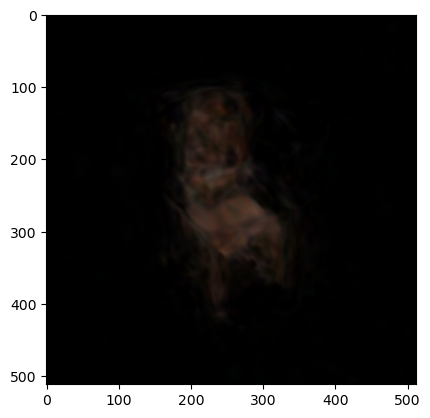

In [21]:
batch = chairs.train_dataset[345]
print(f"BEGIN OF TRAINING PHI {model.phi}")
model.train_latent(batch)
print(f"END OF TRAINING PHI {model.phi}")
coords = get_mgrid(512, 2)

output = model(coords)
output = output * 0.5 + 0.5
print(output)

print(output.shape)

# Plot the image
plt.imshow(output.view(512,512,3).detach().numpy())

plt.show()
